In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('데이터.csv')
train_df

,pid,product,bcateid,mcateid,scateid,dcateid
0,O4486751463,직소퍼즐 1000조각 바다거북의 여행 pl1275,1,1,2,-1
1,P3307178849,모리케이스 아이폰6s 6s tree farm101 다이어리케이스 바보사랑 무료배송,3,3,4,-1
2,R4424255515,크리비아 기모 3부 속바지 glg4314p,5,5,6,-1
3,F3334315393,하프클럽 잭앤질 남성 솔리드 절개라인 포인트 포켓 팬츠 31133pt002 na,7,7,8,-1
4,N731678492,코드프리혈당시험지50매 코드프리시험지 최장유효기간,10,9,11,-1
...,...,...,...,...,...,...
999995,Q4697414634,카렉스 노블맨 웰빙목주시트,34,136,199,-1
999996,N4402110844,아이숲 챠밍래빗 쟈가드 편면내의,5,64,80,-1
999997,Q4029646876,앞포켓크로스백t 131 숄더백 패션크로스백 크로스가방,14,141,726,-1
999998,O1952838815,정식판매처 qnap ts 121 하드미포함 당일배송,24,255,1127,-1


In [3]:
train_df['bcateid'].nunique()

52

# SentencePiece로 토큰나이징 진행
* 상품명으로 학습되는 분절기 사용 
* input : 학습시킬 파일
* model_prefix : 만들어질 모델 이름
* vocab_size : 단어 집합의 크기
* model_type : 사용할 모델 (unigram(default), bpe, char, word)
* max_sentence_length: 문장의 최대 길이

In [4]:
import sentencepiece as spm

In [5]:
# product 칼럼의 상품명을 product.txt 파일명으로 저장한다.
with open('product.txt', 'w', encoding='utf-8') as f:
    f.write(train_df['product'].str.cat(sep='\n'))

In [6]:
# 보통 학습을 진행하기 위해서 vocab_size 25,000 ~ 35,000 정도로 함
# 문장 최대 길이는 분석한 결과 109개 단어임
spm.SentencePieceTrainer.Train('--input=product.txt --model_type=bpe --model_prefix=product --vocab_size=35000 \
                               --max_sentence_length=109 --shuffle_input_sentence=true')

In [7]:
# 센텐스피스 모델을 로드한다.
sp = spm.SentencePieceProcessor()
sp.Load('product.model')

# product 칼럼의 상품명을 분절한 결과를 tokenized_product 칼럼에 저장한다.
train_df['tokens'] = train_df['product'].map(lambda x: " ".join(sp.EncodeAsPieces(x)) )

train_df[['product', 'tokens']].head()

,product,tokens
0,직소퍼즐 1000조각 바다거북의 여행 pl1275,▁직소퍼즐 ▁1000 조각 ▁바다거북 의 ▁여행 ▁pl 1275
1,모리케이스 아이폰6s 6s tree farm101 다이어리케이스 바보사랑 무료배송,▁모리케이스 ▁아이폰 6 s ▁6 s ▁tree ▁farm 101 ▁다이어리케이스 ...
2,크리비아 기모 3부 속바지 glg4314p,▁크리비아 ▁기모 ▁3 부 ▁속바지 ▁gl g 43 14 p
3,하프클럽 잭앤질 남성 솔리드 절개라인 포인트 포켓 팬츠 31133pt002 na,▁하프클럽 ▁잭앤질 ▁남성 ▁솔리드 ▁절개라인 ▁포인트 ▁포켓 ▁팬츠 ▁311 33...
4,코드프리혈당시험지50매 코드프리시험지 최장유효기간,▁코드 프리 혈 당 시험지 50 매 ▁코드 프리 시험지 ▁최 장 유 효 기간


In [8]:
import csv
vocab_list = pd.read_csv('product.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list[:10]

,0,1
0,<unk>,0
1,<s>,0
2,</s>,0
3,▁1,0
4,00,-1
5,▁스,-2
6,▁s,-3
7,▁아,-4
8,▁2,-5
9,▁a,-6


In [9]:
len(vocab_list)

35000

In [10]:
sp = spm.SentencePieceProcessor()
vocab_file = "product.model"
sp.load(vocab_file)

True

In [11]:
lines = [
  "직소퍼즐 1000조각 바다거북의 여행 pl1275",
  "모리케이스 아이폰6s 6s tree farm101 다이어리케이스 바보사랑 무료배송",
]
for line in lines:
    print(line)
    print(sp.encode_as_pieces(line))
    print(sp.encode_as_ids(line))
    print()

직소퍼즐 1000조각 바다거북의 여행 pl1275
['▁직소퍼즐', '▁1000', '조각', '▁바다거북', '의', '▁여행', '▁pl', '1275']
[1643, 827, 1600, 30502, 34027, 1660, 495, 24537]

모리케이스 아이폰6s 6s tree farm101 다이어리케이스 바보사랑 무료배송
['▁모리케이스', '▁아이폰', '6', 's', '▁6', 's', '▁tree', '▁farm', '101', '▁다이어리케이스', '▁바보사랑', '▁무료배송']
[1806, 335, 33882, 33871, 26, 33871, 12876, 27511, 665, 1378, 146, 224]



In [12]:
product_name = []

for i in train_df['product']:
    product_name.append(sp.encode_as_ids(i))

product_name = np.array(product_name)
product_name

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_20232/3284010201.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  product_name = np.array(product_name)


array([list([1643, 827, 1600, 30502, 34027, 1660, 495, 24537]),
       list([1806, 335, 33882, 33871, 26, 33871, 12876, 27511, 665, 1378, 146, 224]),
       list([5170, 559, 12, 34009, 11048, 2018, 33895, 1396, 81, 33887]),
       ..., list([21390, 1277, 33885, 10140, 649, 24705, 14521]),
       list([7934, 1787, 34312, 23644, 521, 1855, 10051, 30593, 6656]),
       list([1278, 8693, 6115, 6217, 4082, 5897, 5957, 33874, 840, 2363, 33894, 49, 3063])],
      dtype=object)

# 전처리 진행

In [13]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [14]:
data = product_name
target = train_df['bcateid']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target)

In [15]:
max_len = 109

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

In [16]:
X_train

array([[    0,     0,     0, ...,   362,   237,  8816],
       [    0,     0,     0, ...,    48, 33871, 11122],
       [    0,     0,     0, ..., 15561,   773, 33895],
       ...,
       [    0,     0,     0, ...,  4280,     8, 33887],
       [    0,     0,     0, ...,  9813,  1461,  6840],
       [    0,     0,     0, ..., 33926, 33980,  2605]])

# 멀티 헤드 어텐션

In [17]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads=8):
        super(MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim # d_model
        self.num_heads = num_heads

        assert embedding_dim % self.num_heads == 0

        self.projection_dim = embedding_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embedding_dim)
        self.key_dense = tf.keras.layers.Dense(embedding_dim)
        self.value_dense = tf.keras.layers.Dense(embedding_dim)
        self.dense = tf.keras.layers.Dense(embedding_dim)
        
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'embedding_dim': 'self.embedding_dim',
            'num_heads': 'self.num_heads',
            'projection_dim': 'self.projection_dim',
            'query_dense': 'self.query_dense',
            'key_dense': 'self.key_dense',
            'value_dense': 'self.value_dense',
            'dense': 'self.dense'
        })
        return config

    def scaled_dot_product_attention(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        depth = tf.cast(tf.shape(key)[-1], tf.float32)
        logits = matmul_qk / tf.math.sqrt(depth)
        attention_weights = tf.nn.softmax(logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]

        # (batch_size, seq_len, embedding_dim)
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        # (batch_size, num_heads, seq_len, projection_dim)
        query = self.split_heads(query, batch_size)  
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)
        # (batch_size, seq_len, num_heads, projection_dim)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  

        # (batch_size, seq_len, embedding_dim)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))
        outputs = self.dense(concat_attention)
        return outputs

# 인코더 설계

In [18]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(embedding_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dense(embedding_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'att': 'self.att',
            'ffn': 'self.ffn',
            'layernorm1': 'self.layernorm1',
            'layernorm2': 'self.layernorm2',
            'dropout1': 'self.dropout1',
            'dropout2': 'self.dropout2'
        })
        return config

    def call(self, inputs, training):
        attn_output = self.att(inputs) # 첫번째 서브층 : 멀티 헤드 어텐션
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) # Add & Norm
        ffn_output = self.ffn(out1) # 두번째 서브층 : 포지션 와이즈 피드 포워드 신경망
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output) # Add & Norm

# 포지션 임베딩

In [19]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, max_len, vocab_size, embedding_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.pos_emb = tf.keras.layers.Embedding(max_len, embedding_dim)

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'token_emb': 'self.token_emb',
            'pos_emb': 'self.pos_emb'
        })
        return config
        
    def call(self, x):
        max_len = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=max_len, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

# 트랜스포머를 이용한 쇼핑몰 카테고리 분류

In [20]:
embedding_dim = 128  # 각 단어의 임베딩 벡터의 차원
num_heads = 2  # 어텐션 헤드의 수
dff = 128  # 포지션 와이즈 피드 포워드 신경망의 은닉층의 크기
vocab_size = 35000 # sentencepiece와 동일
max_len = 109 # 상품명 최대 길이는 109개 단어

inputs = tf.keras.layers.Input(shape=(max_len,))
embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embedding_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embedding_dim, num_heads, dff)
x = transformer_block(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(53, activation="softmax")(x) # 카테고리 ID는 1부터 시작하므로 카테고리 개수 + 1 해줘야 함

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [22]:
es = EarlyStopping(monitor='val_loss', mode = "auto", verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode = "auto", verbose=1, save_best_only=True)

In [23]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=32, epochs=30, callbacks=[es, mc], validation_split=0.2)

Epoch 1/30
20000/20000 [==============================] - 809s 40ms/step - loss: 0.4739 - accuracy: 0.8835 - val_loss: 0.2133 - val_accuracy: 0.9489

Epoch 00001: val_loss improved from inf to 0.21334, saving model to best_model.h5
Epoch 2/30
20000/20000 [==============================] - 383s 19ms/step - loss: 0.1848 - accuracy: 0.9550 - val_loss: 0.1742 - val_accuracy: 0.9576

Epoch 00002: val_loss improved from 0.21334 to 0.17421, saving model to best_model.h5
Epoch 3/30
20000/20000 [==============================] - 328s 16ms/step - loss: 0.1335 - accuracy: 0.9668 - val_loss: 0.1669 - val_accuracy: 0.9598

Epoch 00003: val_loss improved from 0.17421 to 0.16692, saving model to best_model.h5
Epoch 4/30
20000/20000 [==============================] - 329s 16ms/step - loss: 0.1044 - accuracy: 0.9738 - val_loss: 0.1771 - val_accuracy: 0.9627

Epoch 00004: val_loss did not improve from 0.16692
Epoch 5/30
20000/20000 [==============================] - 334s 17ms/step - loss: 0.0869 - accur

In [24]:
print("테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

6250/6250 [==============================] - 30s 5ms/step - loss: 0.1835 - accuracy: 0.9637
테스트 정확도: 0.9637


In [25]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

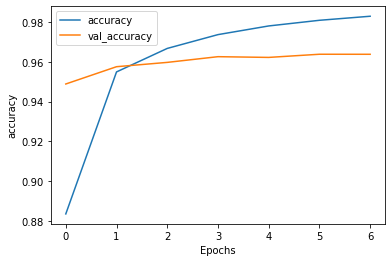

In [26]:
plot_graphs(history, 'accuracy')

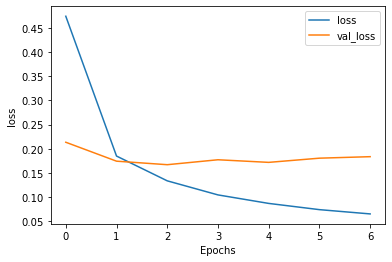

In [27]:
plot_graphs(history, 'loss')

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
pred = model.predict(X_test)
pred

array([[6.87725091e-25, 9.89414106e-10, 6.50740830e-08, ...,
        1.00034065e-12, 4.35411183e-22, 7.52274833e-28],
       [1.16051245e-23, 1.61705138e-09, 1.04017941e-08, ...,
        4.38799066e-15, 1.59885886e-20, 2.36124423e-12],
       [5.46426508e-26, 2.09208540e-12, 5.61138491e-14, ...,
        2.72574887e-08, 4.03152289e-20, 2.61170251e-25],
       ...,
       [1.18440599e-22, 5.58130001e-11, 2.63390503e-12, ...,
        4.23746172e-07, 2.67795951e-17, 2.92810426e-21],
       [5.82549368e-22, 6.52731114e-09, 1.65423756e-07, ...,
        7.44782222e-11, 2.91205548e-19, 3.09722174e-25],
       [2.69037590e-38, 1.20033708e-14, 7.29707527e-13, ...,
        4.47172847e-17, 8.53426052e-30, 7.51104938e-25]], dtype=float32)

In [30]:
predict = []
for i in range(pred.shape[0]):
    predict.append(pred[i].argmax())
predict = np.array(predict)
predict

array([17, 24,  9, ...,  9, 17, 28], dtype=int64)

In [31]:
print (' \n confusion_matrix of Self-Attention \n ')
cm = confusion_matrix(y_test, predict)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, predict))

 
 confusion_matrix of Self-Attention 
 
[[1936   30    0 ...    2    1    0]
 [  82 5133    2 ...    6    0    1]
 [   1    1 8775 ...    0    0    0]
 ...
 [   2   11    1 ... 1869    2    1]
 [   0    0    0 ...    1  621    0]
 [   0    0    1 ...    1    0  149]]

 Here is the classification report:


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.92      0.94      0.93      2062
           2       0.97      0.95      0.96      5406
           3       0.98      0.99      0.99      8850
           4       0.98      0.96      0.97      1796
           5       0.98      0.97      0.98      8595
           6       0.95      0.92      0.93     11376
           7       0.95      0.96      0.96     12209
           8       0.98      0.97      0.98      2798
           9       0.96      0.98      0.97     17563
          10       0.93      0.87      0.90       231
          11       0.96      0.98      0.97      5464
          12       0.94      0.95      0.94      3997
          13       0.97      0.97      0.97      4528
          14       0.98      0.98      0.98     20146
          15       0.97      0.98      0.97      1446
          16       0.98      0.96      0.97      5292
          17       0.96      0.98      0.97     10120
          18       0.97    

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 다층 LSTM을 이용한 쇼핑몰 카테고리 분류

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout

In [33]:
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [34]:
vocab_size = 35000 # sentencepiece와 동일
embedding_dim = 128
hidden_units = 128
num_classes = 53 # 카테고리 ID는 1부터 시작하므로 카테고리 개수 + 1 해줘야 함

model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim))
model1.add(LSTM(hidden_units, return_sequences=True))
model1.add(LSTM(hidden_units))
model1.add(Dropout(0.2))
model1.add(Dense(hidden_units, activation='tanh'))
model1.add(Dense(num_classes, activation='softmax'))

In [35]:
es = EarlyStopping(monitor='val_loss', mode = "auto", verbose=1, patience=4)
mc = ModelCheckpoint('best_model1.h5', monitor='val_loss', mode = "auto", verbose=1, save_best_only=True)

In [36]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
history1 = model1.fit(X_train, y_train, batch_size=32, epochs=30, callbacks=[es, mc], validation_split=0.2)

Epoch 1/30
20000/20000 [==============================] - 401s 20ms/step - loss: 0.3945 - accuracy: 0.8960 - val_loss: 0.1738 - val_accuracy: 0.9539

Epoch 00001: val_loss improved from inf to 0.17377, saving model to best_model1.h5
Epoch 2/30
20000/20000 [==============================] - 390s 20ms/step - loss: 0.1288 - accuracy: 0.9657 - val_loss: 0.1383 - val_accuracy: 0.9641

Epoch 00002: val_loss improved from 0.17377 to 0.13829, saving model to best_model1.h5
Epoch 3/30
20000/20000 [==============================] - 401s 20ms/step - loss: 0.0847 - accuracy: 0.9771 - val_loss: 0.1342 - val_accuracy: 0.9662

Epoch 00003: val_loss improved from 0.13829 to 0.13424, saving model to best_model1.h5
Epoch 4/30
20000/20000 [==============================] - 406s 20ms/step - loss: 0.0590 - accuracy: 0.9838 - val_loss: 0.1377 - val_accuracy: 0.9666

Epoch 00004: val_loss did not improve from 0.13424
Epoch 5/30
20000/20000 [==============================] - 377s 19ms/step - loss: 0.0414 - ac

In [38]:
print("\n 테스트 정확도: %.4f" % (model1.evaluate(X_test, y_test)[1]))

6250/6250 [==============================] - 44s 7ms/step - loss: 0.1796 - accuracy: 0.9656

 테스트 정확도: 0.9656


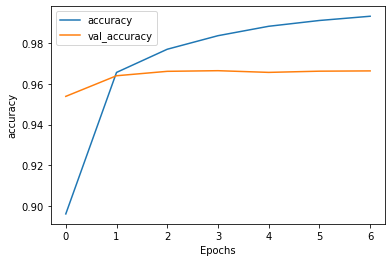

In [39]:
plot_graphs(history1, 'accuracy')

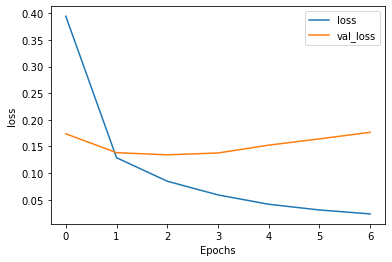

In [40]:
plot_graphs(history1, 'loss')

In [41]:
pred1 = model1.predict(X_test)
pred1

array([[1.41164700e-15, 3.88449446e-11, 2.00873584e-12, ...,
        7.81782694e-10, 9.22069902e-15, 9.35041026e-15],
       [1.48607155e-15, 9.75910410e-08, 1.33621839e-07, ...,
        8.14076410e-12, 1.76077544e-12, 2.12597193e-08],
       [3.80873735e-11, 8.34041174e-08, 6.85338819e-07, ...,
        5.73921213e-08, 7.86591875e-13, 2.07515677e-06],
       ...,
       [8.82326642e-14, 4.90550107e-08, 6.54891835e-11, ...,
        3.43163187e-09, 3.05771380e-10, 3.02421074e-11],
       [1.52219914e-12, 3.18636850e-08, 3.18016504e-07, ...,
        6.01010575e-10, 5.82598358e-10, 1.33723782e-10],
       [1.33504249e-11, 1.20862707e-08, 1.35480309e-06, ...,
        4.65098848e-09, 1.01247055e-08, 2.53019872e-09]], dtype=float32)

In [42]:
predict1 = []
for i in range(pred1.shape[0]):
    predict1.append(pred1[i].argmax())
predict1 = np.array(predict1)
predict1

array([20, 25, 34, ..., 14, 35, 13], dtype=int64)

In [43]:
print (' \n confusion_matrix of multi-layered LSTM \n ')
cm = confusion_matrix(y_test, predict1)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, predict1))

 
 confusion_matrix of multi-layered LSTM 
 
[[1938   43    0 ...    2    0    0]
 [  31 5163    5 ...    8    0    0]
 [   1    5 8750 ...    1    0    1]
 ...
 [   0    7    1 ... 1875    6    0]
 [   0    1    0 ...    1  620    0]
 [   0    0    1 ...    0    0  154]]

 Here is the classification report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95      2062
           2       0.96      0.96      0.96      5406
           3       0.99      0.99      0.99      8850
           4       0.96      0.98      0.97      1796
           5       0.98      0.98      0.98      8595
           6       0.93      0.94      0.93     11376
           7       0.95      0.96      0.96     12209
           8       0.98      0.98      0.98      2798
           9       0.97      0.97      0.97     17563
          10       0.90      0.86      0.88       231
          11       0.98      0.97      0.98      5464
          12       0.94      0.95      0.

# 일반 LSTM

In [44]:
vocab_size = 35000 # sentencepiece와 동일
embedding_dim = 128
hidden_units = 128
num_classes = 53 # 카테고리 ID는 1부터 시작하므로 카테고리 개수 + 1 해줘야 함

model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dim))
model2.add(LSTM(hidden_units))
model2.add(Dense(num_classes, activation='softmax'))

In [45]:
es = EarlyStopping(monitor='val_loss', mode = "auto", verbose=1, patience=4)
mc = ModelCheckpoint('best_model2.h5', monitor='val_loss', mode = "auto", verbose=1, save_best_only=True)

In [46]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
history2 = model2.fit(X_train, y_train, batch_size=32, epochs=30, callbacks=[es, mc], validation_split=0.2)

Epoch 1/30
20000/20000 [==============================] - 271s 13ms/step - loss: 0.3367 - accuracy: 0.9113 - val_loss: 0.1460 - val_accuracy: 0.9603

Epoch 00001: val_loss improved from inf to 0.14601, saving model to best_model2.h5
Epoch 2/30
20000/20000 [==============================] - 265s 13ms/step - loss: 0.0992 - accuracy: 0.9725 - val_loss: 0.1245 - val_accuracy: 0.9662

Epoch 00002: val_loss improved from 0.14601 to 0.12448, saving model to best_model2.h5
Epoch 3/30
20000/20000 [==============================] - 266s 13ms/step - loss: 0.0608 - accuracy: 0.9827 - val_loss: 0.1265 - val_accuracy: 0.9675

Epoch 00003: val_loss did not improve from 0.12448
Epoch 4/30
20000/20000 [==============================] - 266s 13ms/step - loss: 0.0382 - accuracy: 0.9890 - val_loss: 0.1335 - val_accuracy: 0.9679

Epoch 00004: val_loss did not improve from 0.12448
Epoch 5/30
20000/20000 [==============================] - 266s 13ms/step - loss: 0.0238 - accuracy: 0.9931 - val_loss: 0.1456 - 

In [48]:
print("\n 테스트 정확도: %.4f" % (model2.evaluate(X_test, y_test)[1]))

6250/6250 [==============================] - 26s 4ms/step - loss: 0.1600 - accuracy: 0.9666

 테스트 정확도: 0.9666


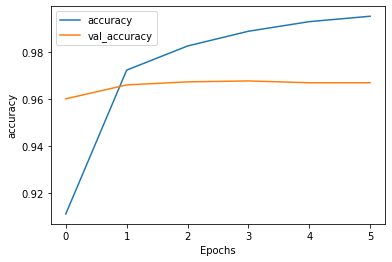

In [49]:
plot_graphs(history2, 'accuracy')

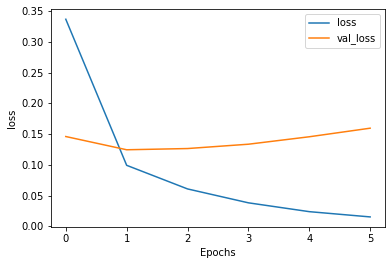

In [50]:
plot_graphs(history2, 'loss')

In [51]:
pred2 = model2.predict(X_test)
pred2

array([[7.01181070e-18, 2.23491069e-11, 3.44023254e-10, ...,
        5.03285937e-14, 5.46492816e-11, 9.16665408e-15],
       [9.07027629e-17, 1.62286712e-10, 4.03578948e-09, ...,
        2.29660496e-12, 1.38114954e-11, 1.41311338e-10],
       [5.54457942e-15, 1.52783155e-08, 1.08638766e-07, ...,
        3.12422230e-08, 3.86721011e-09, 9.59713930e-07],
       ...,
       [1.11714063e-19, 3.92980006e-12, 9.36775310e-12, ...,
        2.89074542e-09, 1.38832603e-13, 8.42497662e-14],
       [4.12735249e-13, 1.75994763e-09, 2.26037391e-05, ...,
        2.25496173e-08, 1.18969987e-10, 3.01379394e-10],
       [1.83827657e-13, 5.08020459e-10, 1.64076877e-11, ...,
        4.45233361e-09, 5.47737233e-09, 7.10509082e-11]], dtype=float32)

In [52]:
predict2 = []
for i in range(pred2.shape[0]):
    predict2.append(pred2[i].argmax())
predict2 = np.array(predict2)
predict2

array([20, 25, 34, ..., 14, 35, 13], dtype=int64)

In [53]:
print (' \n confusion_matrix of LSTM \n ')
cm = confusion_matrix(y_test, predict2)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, predict2))

 
 confusion_matrix of LSTM 
 
[[1949   45    1 ...    3    1    0]
 [  38 5181    6 ...   12    0    0]
 [   4    3 8755 ...    1    0    0]
 ...
 [   2    7    0 ... 1888    2    0]
 [   3    2    0 ...    1  615    0]
 [   0    0    0 ...    0    0  154]]

 Here is the classification report:


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.95      0.95      0.95      2062
           2       0.96      0.96      0.96      5406
           3       0.99      0.99      0.99      8850
           4       0.97      0.96      0.97      1796
           5       0.97      0.98      0.98      8595
           6       0.94      0.93      0.93     11376
           7       0.96      0.96      0.96     12209
           8       0.98      0.98      0.98      2798
           9       0.97      0.97      0.97     17563
          10       0.94      0.85      0.89       231
          11       0.98      0.97      0.97      5464
          12       0.95      0.96      0.95      3997
          13       0.97      0.96      0.97      4528
          14       0.98      0.99      0.98     20146
          15       0.98      0.96      0.97      1446
          16       0.97      0.98      0.97      5293
          17       0.97      0.97      0.97     10120
          18       0.97    

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
